In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("properties_2017.csv")
    dataO = pd.read_csv("properties_2016.csv")
    #data = pd.read_csv("train_2017.csv")
    print "dataset has {} samples with {} features each.".format(*data.shape)
    print "Older dataset has {} samples with {} features each.".format(*dataO.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

/Users/TheResearcher/Desktop/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/TheResearcher/Desktop/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dataset has 2985217 samples with 58 features each.
Older dataset has 2985217 samples with 58 features each.


In [2]:
#(data.ix[:,49]).isnull().values.all() # if all values of column 49 are null 
#(data.ix[:,49]).isnull().sum() #column 49 s count of null values
#data.ix[:,49].loc[~(data.ix[:,49]).isnull()] #not null values of column 49
dataO.loc[dataO['parcelid']==10711910]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
1872737,10711910,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,NaN,57098.0,76860.0,2015.0,19762.0,1116.46,NaN,NaN,6.037113e+13


In [3]:
#Remove columns with too many nulls
#for i in data.columns[:]:
    #if((data[i]).isnull().sum() > 1000000): #returns true if count of nulls in a column exceeds 1000000
#    print (data[i]).isnull().sum()
try:
    trans = pd.read_csv("train_2017.csv")
    transO = pd.read_csv("train_2016.csv")
    #sample = pd.read_csv("sample_submission.csv")
    print "transaction dataset has {} samples with {} features each.".format(*trans.shape)
    print "Older transaction dataset has {} samples with {} features each.".format(*transO.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

transaction dataset has 77613 samples with 3 features each.
Older transaction dataset has 90275 samples with 3 features each.


In [4]:
#data_reduced[~data_reduced['parcelid'].isin(trans['parcelid'])].index
transO.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [5]:
trans = pd.concat([trans.drop('transactiondate', axis = 1), 
          (trans.transactiondate.str.split("-|T").str[:3].apply(pd.Series)
          .rename(columns={0:'Tyear', 1:'Tmonth', 2:'Tday'}))], axis = 1)

In [6]:
transO = pd.concat([transO.drop('transactiondate', axis = 1), 
          (transO.transactiondate.str.split("-|T").str[:3].apply(pd.Series)
          .rename(columns={0:'Tyear', 1:'Tmonth', 2:'Tday'}))], axis = 1)

In [7]:
merged = [trans,transO]
result = pd.concat(merged)

In [8]:
#sorted(result['Tyear'].unique())
#result.shape
#result.duplicated('parcelid') 
#len(result['parcelid'].unique())
#len(result['parcelid'])

In [9]:
#all those rows in data_reduced whose parcelid dont match with those in trans
data_reduced = data.drop(data[~data['parcelid'].isin(trans['parcelid'])].index)
#trans[trans['parcelid'] == 17054981]

In [10]:
dataO_reduced = dataO.drop(dataO[~dataO['parcelid'].isin(transO['parcelid'])].index)
#transO[transO['parcelid'] == 17100444]

In [11]:
dataO_reduced.shape

(90150, 58)

In [12]:
merged = [data_reduced, dataO_reduced]
data_reduced_comb = pd.concat(merged)

In [13]:
#data_trans_reduced_comb.loc[data_trans_reduced_comb['parcelid'] == 10711923]

In [14]:
#result[~result['parcelid'].isin(data_trans_reduced_comb_f['parcelid'])]
#data_reduced_comb[~(data_reduced_comb['assessmentyear'].isnull()) & data_reduced_comb['assessmentyear'] != data_reduced_comb['']]
#data_reduced_comb_trans[data_reduced_comb_trans['assessmentyear'].isnull()].groupby('parcelid').size()

data_trans_reduced_comb_p = pd.merge(data_reduced_comb,result,on='parcelid') #preliminary

#remove the whole null row
data_trans_reduced_comb_p = data_trans_reduced_comb_p.drop(data_trans_reduced_comb_p[data_trans_reduced_comb_p['parcelid'] == 11491470].index)
data_trans_reduced_comb_p.shape

(172599, 62)

In [15]:
data_trans_reduced_comb_f = data_trans_reduced_comb_p[data_trans_reduced_comb_p['assessmentyear'] == (data_trans_reduced_comb_p['Tyear']).astype(int) - 1] #final
data_trans_reduced_comb_f.shape

#print data_trans_reduced_comb_p[data_trans_reduced_comb_p['assessmentyear'] == (data_trans_reduced_comb_p['Tyear']).astype(int) - 1] #final
#sorted(data_reduced_comb_trans['parcelid'])
#np.where(data_reduced_comb_trans.groupby('parcelid').size() == 2)

(167854, 62)

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
pd.options.display.max_rows = 4000

In [18]:
data_trans_reduced_comb_f.head()
data_trans_reduced_comb_f.shape

(167854, 62)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data_trans_reduced_comb_f.loc[:,'abslogerror'] = data_trans_reduced_comb_f['logerror'].abs() #add new column
data_trans_reduced_comb_f.head()

/Users/TheResearcher/Desktop/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/TheResearcher/Desktop/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,Tyear,Tmonth,Tday,abslogerror
0,17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,1968.0,3760.0,3760.0,NaN,NaN,1968.0,NaN,6111.0,4.0,5.0,3.0,784.0,NaN,NaN,34449407.0,-119254052.0,42688.0,1.0,735.0,NaN,NaN,1.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,1982.0,2.0,NaN,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017,06,15,0.013099
1,17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,1444.0,1444.0,1444.0,NaN,NaN,1444.0,NaN,6111.0,NaN,2.0,1.0,0.0,NaN,NaN,34454169.0,-119237898.0,7108.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1951.0,1.0,NaN,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017,07,26,0.073985
2,17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,1698.0,1698.0,1698.0,NaN,NaN,1698.0,NaN,6111.0,1.0,1.0,0.0,0.0,NaN,NaN,34365693.0,-119448392.0,2588.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97081.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,1979.0,1.0,NaN,193413.0,286606.0,2016.0,93193.0,2987.36,NaN,NaN,6.111001e+13,0.071886,2017,07,28,0.071886
3,17073952,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,986.0,986.0,986.0,NaN,NaN,986.0,NaN,6111.0,1.0,2.0,1.0,0.0,NaN,NaN,34305600.0,-119284000.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,4.0,NaN,NaN,NaN,NaN,55.0,NaN,1989.0,1.0,NaN,90357.0,258888.0,2016.0,168531.0,2706.24,NaN,NaN,6.111002e+13,0.305680,2017,06,02,0.305680
4,17078502,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1170.0,1170.0,1170.0,NaN,NaN,1170.0,NaN,6111.0,1.0,1.0,2.0,621.0,NaN,NaN,34278012.0,-119257047.0,5643.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,148752.0,592930.0,2016.0,444178.0,6220.70,NaN,NaN,6.111002e+13,-0.073787,2017,07,07,0.073787


In [21]:
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib.text import Text

In [22]:
'''
fig, ax = plt.subplots(figsize=(size, size))
t = Text(verticalalignment='top')
plt.xticks(range(len(corr.columns)), corr.columns, verticalalignment='top', rotation = 90, size=40)
plt.yticks(range(len(corr.columns)), corr.columns, size=40)
plt.imshow(corr, cmap='hot')
#aspect='auto',shape=(corr.iterrows,corr.columns, interpolation='nearest') 
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=50)
#plt.show()
#ax.matshow(corr)  
'''


"\nfig, ax = plt.subplots(figsize=(size, size))\nt = Text(verticalalignment='top')\nplt.xticks(range(len(corr.columns)), corr.columns, verticalalignment='top', rotation = 90, size=40)\nplt.yticks(range(len(corr.columns)), corr.columns, size=40)\nplt.imshow(corr, cmap='hot')\n#aspect='auto',shape=(corr.iterrows,corr.columns, interpolation='nearest') \ncbar = plt.colorbar()\ncbar.ax.tick_params(labelsize=50)\n#plt.show()\n#ax.matshow(corr)  \n"

In [23]:
def plot_corr(df,size=8):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, vmax=1., square=True)
    plt.xticks(verticalalignment='top', rotation = 90, size=12)
    plt.yticks(size=12)
    plt.title("Important variables correlation map", fontsize=15)
    plt.show()    

In [24]:
#df = data_trans_reduced_comb_f.melt('parcelid',var_name='Columns',  value_name='Values')
#g = sns.factorplot(x="parcelid", y="Values", hue='Columns', data=df)
#data_trans_reduced_comb_f.shape

data_trans_reduced_comb_f_nn = data_trans_reduced_comb_f.loc[:,data_trans_reduced_comb_f.isnull().sum()<100000]

In [25]:
#filter rows based on conditional check on column
#data_trans_reduced_comb_f_nn.loc[:,data_trans_reduced_comb_f_nn.isnull().sum() > 1].head()

In [26]:
data_trans_reduced_comb_f_nn.loc[:, data_trans_reduced_comb_f_nn.isnull().sum() == 0].head()

,parcelid,bathroomcnt,bedroomcnt,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidcounty,roomcnt,assessmentyear,logerror,Tyear,Tmonth,Tday,abslogerror
0,17054981,5.0,4.0,6111.0,34449407.0,-119254052.0,261.0,6.111001e+07,2061.0,11.0,2016.0,-0.013099,2017,06,15,0.013099
1,17055743,2.0,3.0,6111.0,34454169.0,-119237898.0,261.0,6.111001e+07,2061.0,6.0,2016.0,0.073985,2017,07,26,0.073985
2,17068109,1.5,3.0,6111.0,34365693.0,-119448392.0,261.0,6.111001e+07,2061.0,6.0,2016.0,0.071886,2017,07,28,0.071886
3,17073952,2.0,2.0,6111.0,34305600.0,-119284000.0,266.0,6.111002e+07,2061.0,4.0,2016.0,0.305680,2017,06,02,0.305680
4,17078502,1.0,2.0,6111.0,34278012.0,-119257047.0,261.0,6.111002e+07,2061.0,5.0,2016.0,-0.073787,2017,07,07,0.073787


In [27]:
after_remov_parcelid_df = data_trans_reduced_comb_f_nn.drop('parcelid',axis=1)

In [28]:
def plot_countPlot(df,label):
    plt.figure(figsize=(12,8))
    sns.countplot(x=label, data=df)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(label, fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title("Frequency of "+ label +" count", fontsize=15)
    plt.show()

In [29]:
#plot_countPlot(after_imputing_df,'propertylandusetypeid')

In [161]:
index = after_remov_parcelid_df.heatingorsystemtypeid.isnull()
after_remov_parcelid_df.loc[index,'heatingorsystemtypeid'] = 2
after_imputing_df = after_remov_parcelid_df.drop('heatingorsystemtypeid', axis=1)
after_imputing_df = after_imputing_df.fillna(after_imputing_df.mean(axis=0))
after_imputing_df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,Tyear,Tmonth,Tday,abslogerror
0,5.0,4.0,6.015461,5.0,3760.0,3760.0,6111.0,5.0,34449407.0,-119254052.0,42688.000000,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,11.0,1.110365,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,6.111001e+13,-0.013099,2017,06,15,0.013099
1,2.0,3.0,6.015461,2.0,1444.0,1444.0,6111.0,2.0,34454169.0,-119237898.0,7108.000000,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,6.0,1.110365,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,6.111001e+13,0.073985,2017,07,26,0.073985
2,1.5,3.0,6.015461,1.5,1698.0,1698.0,6111.0,1.0,34365693.0,-119448392.0,2588.000000,1110,261.0,NaN,6.111001e+07,34543.0,2061.0,97081.0,6.0,1.110365,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,6.111001e+13,0.071886,2017,07,28,0.071886
3,2.0,2.0,6.015461,2.0,986.0,986.0,6111.0,2.0,34305600.0,-119284000.0,29510.596012,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,4.0,1.110365,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,6.111002e+13,0.305680,2017,06,02,0.305680
4,1.0,2.0,6.015461,1.0,1170.0,1170.0,6111.0,1.0,34278012.0,-119257047.0,5643.000000,1110,261.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,5.0,1.110365,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,6.111002e+13,-0.073787,2017,07,07,0.073787


In [31]:
#after_corr_sel_df['']
#plot_countPlot(after_corr_sel_df,'buildingqualitytypeid')

In [162]:
after_imputing_df.loc[:,'heatingorsystemtypeid'] = after_remov_parcelid_df['heatingorsystemtypeid']

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

In [34]:
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

In [35]:
after_remov_parcelid_df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,Tyear,Tmonth,Tday,abslogerror
0,5.0,4.0,NaN,5.0,3760.0,3760.0,6111.0,5.0,2.0,34449407.0,-119254052.0,42688.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,11.0,NaN,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,6.111001e+13,-0.013099,2017,06,15,0.013099
1,2.0,3.0,NaN,2.0,1444.0,1444.0,6111.0,2.0,2.0,34454169.0,-119237898.0,7108.0,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,97099.0,6.0,NaN,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,6.111001e+13,0.073985,2017,07,26,0.073985
2,1.5,3.0,NaN,1.5,1698.0,1698.0,6111.0,1.0,2.0,34365693.0,-119448392.0,2588.0,1110,261.0,NaN,6.111001e+07,34543.0,2061.0,97081.0,6.0,NaN,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,6.111001e+13,0.071886,2017,07,28,0.071886
3,2.0,2.0,NaN,2.0,986.0,986.0,6111.0,2.0,2.0,34305600.0,-119284000.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,4.0,NaN,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,6.111002e+13,0.305680,2017,06,02,0.305680
4,1.0,2.0,NaN,1.0,1170.0,1170.0,6111.0,1.0,2.0,34278012.0,-119257047.0,5643.0,1110,261.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,5.0,NaN,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,6.111002e+13,-0.073787,2017,07,07,0.073787


In [36]:
test = after_remov_parcelid_df.copy()

In [37]:
fillna_knn( df = test,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', n_neighbors = 1 )

fitting
('the shape of active features: ', (12,))
predicting
writing result to df
('num of unperdictable data: ', 585.0)


OneHotEncoder(categorical_features='all', dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

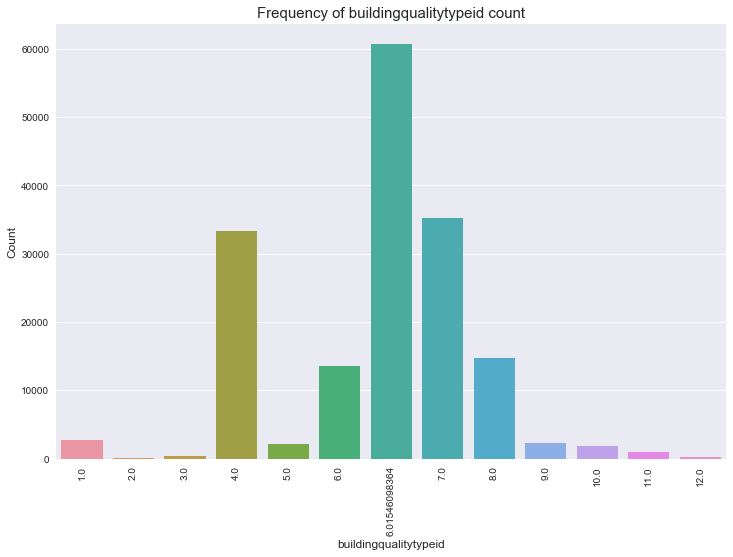

In [38]:
plot_countPlot(after_imputing_df,'buildingqualitytypeid')

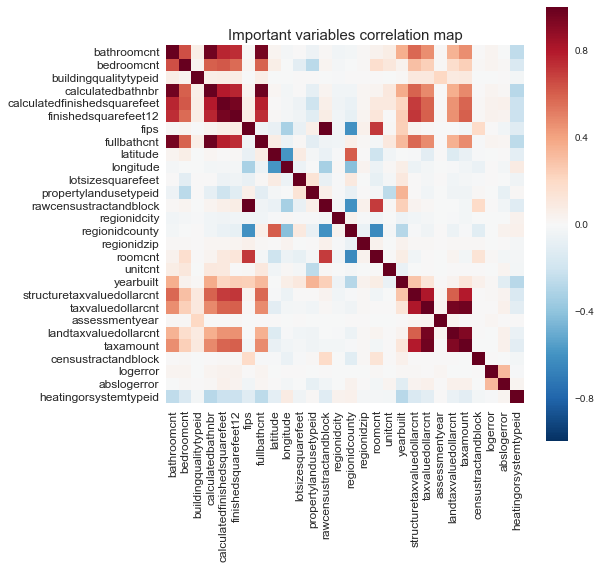

In [39]:
plot_corr(after_imputing_df)

In [40]:
from ggplot import ggplot, geom_line, aes

In [163]:
#after_imputing_df = after_imputing_df.drop('propertyzoningdesc',axis=1)
after_imputing_df = after_imputing_df.drop('censustractandblock',axis=1)

In [42]:
after_encoding_df = after_imputing_df.copy()

In [43]:
test = after_imputing_df.copy()

In [44]:
from sklearn import preprocessing

In [45]:
type(after_imputing_df['propertycountylandusecode'][0])

str

In [46]:
'''
for f in after_encoding_df.columns:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(after_encoding_df[f].values)) 
    after_encoding_df[f] = lbl.transform(list(after_encoding_df[f].values))
'''

'\nfor f in after_encoding_df.columns:\n    lbl = preprocessing.LabelEncoder()\n    lbl.fit(list(after_encoding_df[f].values)) \n    after_encoding_df[f] = lbl.transform(list(after_encoding_df[f].values))\n'

In [47]:
#pd.scatter_matrix(after_corr_sel_df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
#df[[col for col in df.columns if "Vibration" in col]]
#after_imp_log_df = test.filter(like"propertycountylandusecode")
#after_imp_log_df = test[[col for col in test.columns if col not in ["propertycountylandusecode","propertyzoningdesc"]]]
#after_imp_log_df['Tday'] = after_imp_log_df['Tday'].astype(float)
#after_imp_log_df = after_imp_log_df.apply(lambda x: np.log(x + 1))
#after_imp_log_df.head()

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
after_imputing_df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,Tyear,Tmonth,Tday,abslogerror,heatingorsystemtypeid
0,5.0,4.0,6.015461,5.0,3760.0,3760.0,6111.0,5.0,34449407.0,-119254052.0,42688.000000,261.0,6.111001e+07,13091.0,2061.0,97099.0,11.0,1.110365,1982.0,501928.0,872850.0,2016.0,370922.0,9673.46,-0.013099,2017,06,15,0.013099,2.0
1,2.0,3.0,6.015461,2.0,1444.0,1444.0,6111.0,2.0,34454169.0,-119237898.0,7108.000000,261.0,6.111001e+07,13091.0,2061.0,97099.0,6.0,1.110365,1951.0,130845.0,436157.0,2016.0,305312.0,5538.80,0.073985,2017,07,26,0.073985,2.0
2,1.5,3.0,6.015461,1.5,1698.0,1698.0,6111.0,1.0,34365693.0,-119448392.0,2588.000000,261.0,6.111001e+07,34543.0,2061.0,97081.0,6.0,1.110365,1979.0,193413.0,286606.0,2016.0,93193.0,2987.36,0.071886,2017,07,28,0.071886,2.0
3,2.0,2.0,6.015461,2.0,986.0,986.0,6111.0,2.0,34305600.0,-119284000.0,29510.596012,266.0,6.111002e+07,34543.0,2061.0,97081.0,4.0,1.110365,1989.0,90357.0,258888.0,2016.0,168531.0,2706.24,0.305680,2017,06,02,0.305680,2.0
4,1.0,2.0,6.015461,1.0,1170.0,1170.0,6111.0,1.0,34278012.0,-119257047.0,5643.000000,261.0,6.111002e+07,34543.0,2061.0,97083.0,5.0,1.110365,1948.0,148752.0,592930.0,2016.0,444178.0,6220.70,-0.073787,2017,07,07,0.073787,2.0


In [242]:
scaler = MinMaxScaler() # default=(0, 1)

In [243]:
after_imputing_df = after_imputing_df.drop(['propertycountylandusecode','propertyzoningdesc','abslogerror'], axis=1)

In [244]:
#after_imputing_df = after_imputing_df.astype(float) 
numerical = [col for col in after_imputing_df.columns.values if col != 'logerror']
after_scaling_df = pd.DataFrame(scaler.fit_transform(after_imputing_df[numerical]),columns=after_imputing_df[numerical].columns.values)

In [157]:
from ggplot import *

In [76]:
#test = pd.DataFrame(after_imputing_df['longitude'])
#type(test)
test.loc[:,'en_longitude'] = after_encoding_df['longitude']
ggplot(aes(x='longitude', y='en_longitude'), data=test) + \
    geom_point(color='steelblue', size=1) + \
    stat_smooth()

In [245]:
x_cols = [col for col in after_scaling_df.columns if col not in ['abslogerror','logerror'] if (after_scaling_df[col].dtype=='float64' or after_scaling_df[col].dtype=='int64')]
#x_cols = [col for col in after_imputing_df.columns if col not in ['abslogerror','logerror'] if (after_imputing_df[col].dtype=='float64' or after_imputing_df[col].dtype=='int64')]

In [246]:
after_scaling_df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
Tyear                           0
Tmonth                          0
Tday                            0
heatingorsystemtypeid           0
dtype: int64

In [247]:
labels = []
values = []
for col in x_cols:
    labels.append(col)
    #values.append(np.corrcoef(after_imputing_df[col].values, after_imputing_df.abslogerror.values)[0,1])
    values.append(np.corrcoef(after_scaling_df[col].values, after_imputing_df.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
corr_df

,col_labels,corr_values
27,heatingorsystemtypeid,-0.015071
14,regionidcounty,-0.007566
2,buildingqualitytypeid,-0.006248
26,Tday,-0.004944
15,regionidzip,-0.003969
8,latitude,-0.002931
23,taxamount,-0.002186
11,propertylandusetypeid,-0.002179
22,landtaxvaluedollarcnt,-0.000759
13,regionidcity,-0.000598


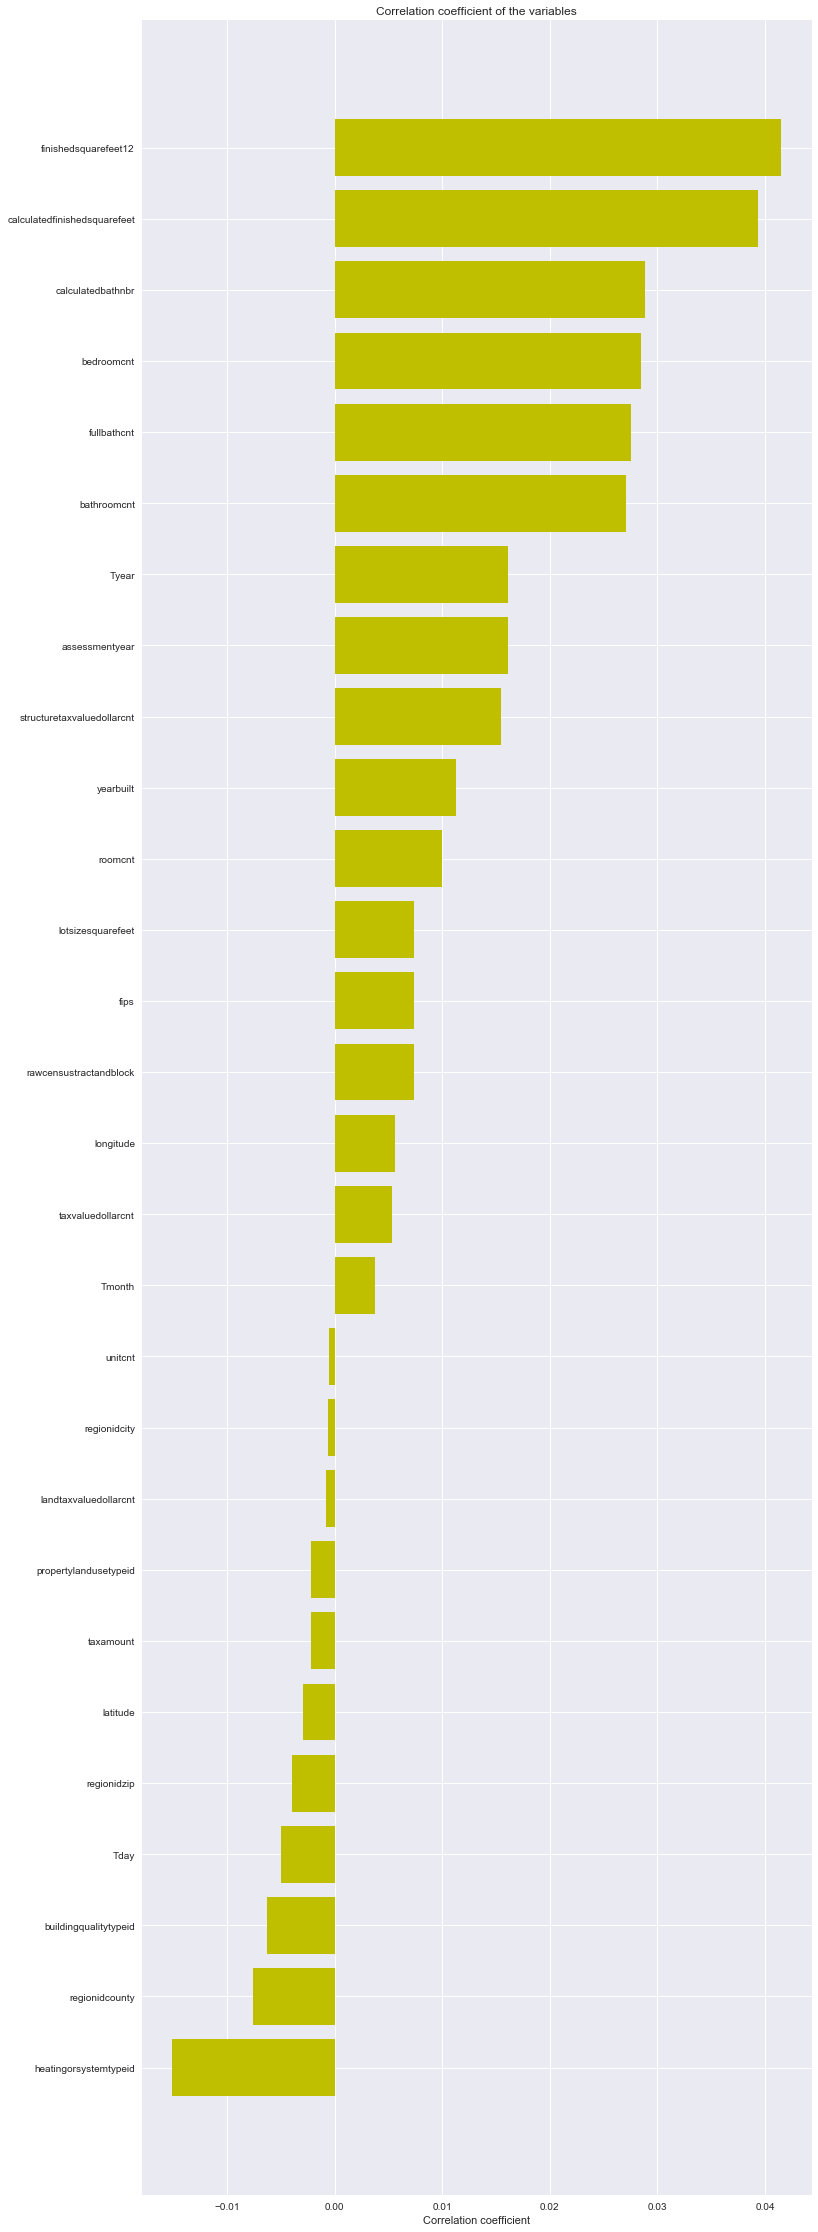

In [248]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
'''
fontdict = {'fontsize': 22,
 'fontweight': mlp.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline'}
'''
ax.set_yticklabels(corr_df.col_labels.values,rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [249]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel
#plot_corr(corr_df_sel)

,col_labels,corr_values
27,heatingorsystemtypeid,-0.015071
0,bathroomcnt,0.027038
7,fullbathcnt,0.027505
1,bedroomcnt,0.028513
3,calculatedbathnbr,0.028830
4,calculatedfinishedsquarefeet,0.039365
5,finishedsquarefeet12,0.041493


In [250]:
after_corr_sel_feat_df = pd.DataFrame(after_scaling_df,columns=corr_df_sel['col_labels'].values)

In [84]:
from sklearn.cross_validation import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(after_corr_sel_feat_df,after_imputing_df['logerror'],test_size=0.25, random_state=42)

# Success
print "Training and testing split was successful."
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

Training and testing split was successful.
(125890, 7)
(125890,)
(41964, 7)
(41964,)


In [252]:
X_test_1, X_test_2, y_test_1,y_test_2 = train_test_split(X_test,y_test,test_size=0.5, random_state=28)

In [253]:
print X_test_1.shape
print y_test_1.shape

(20982, 7)
(20982,)


In [88]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV

In [89]:
xgb_params = {
    'eta': 0.2,
    'max_depth': 3,
    'subsample': 0.7,
#    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1
}

In [254]:
split = 80000
X_train, y_train, X_valid, y_valid = X_train[:split], y_train[:split], X_train[split:], y_train[split:]

In [255]:
y_valid.shape

(45890,)

In [256]:
print('Building DMatrix...')

#both the below ways of initializing DMatrix are equivalent
#d_train = xgb.DMatrix(X_train, label=y_train)
#d_valid = xgb.DMatrix(X_valid, label=y_valid)
d_train = xgb.DMatrix(X_train, y_train)
d_valid = xgb.DMatrix(X_valid)

Building DMatrix...


In [ ]:
from sklearn.metrics import mean_absolute_error

In [257]:
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
#clf = xgb.train(xgb_params, d_train, 100, watchlist, verbose_eval=10) #0.007096

#same as clf results above
model = xgb.train(xgb_params, d_train, 100)
xgb_pred = model.predict(d_valid)
mean_absolute_error(y_valid,xgb_pred)

0.070300213788079408

In [258]:
d_test1 = xgb.DMatrix(X_test_1)
xgb_pred = model.predict(d_test1)
mean_absolute_error(y_test_1,xgb_pred)

0.070964954936066027

In [260]:
d_test2 = xgb.DMatrix(X_test_2)
xgb_pred = model.predict(d_test2)
mean_absolute_error(y_test_2,xgb_pred)

0.070355333169546716

In [127]:
from sklearn.metrics import r2_score

In [259]:
r2_score(y_test_1,xgb_pred)

0.010166829673905364

In [71]:
top_10p_pred = data_trans_reduced_comb_f[data_trans_reduced_comb_f.abslogerror > np.percentile(data_trans_reduced_comb_f.abslogerror,90)]
worst_10p_pred = data_trans_reduced_comb_f[data_trans_reduced_comb_f.abslogerror < np.percentile(data_trans_reduced_comb_f.abslogerror,10)]
middle_pred = data_trans_reduced_comb_f[(data_trans_reduced_comb_f.abslogerror < np.percentile(data_trans_reduced_comb_f.abslogerror,51)) & (data_trans_reduced_comb_f.abslogerror > np.percentile(data_trans_reduced_comb_f.abslogerror,49))]

#data[np.where(data.irow(0)[data.columns].notnull())[0]]
#middle_pred = data_trans_reduced_comb_f[~data_trans_reduced_comb_f['parcelid'].isin(top_10p_pred['parcelid']) & ~data_trans_reduced_comb_f['parcelid'].isin(worst_10p_pred['parcelid'])]